# Credit_Card_Fraud_Detection

This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

## List of Features: <br>

1. **Unnamed: 0** (Likely an internal index for the dataframe, not used for analysis)<br>
2. **trans_date_trans_time** (Original format containing date and time combined)<br>
3. **cc_num** (Credit card number)<br>
4. **merchant** (Name of the merchant where the transaction occurred)<br>
5. **category** (Category of the transaction, e.g., grocery_pos, entertainment)<br>
6. **amt** (Transaction amount)<br>
7. **first** (Customer's first name)<br>
8. **last** (Customer's last name)<br>
9. **gender** (Customer's gender)<br>
10. **street** (Customer's street address)<br>
11. **city** (Customer's city)<br>
12. **state** (Customer's state)<br>
13. **zip** (Customer's zip code)<br>
14. **lat** (Latitude of the transaction location, if available)<br>
15. **long** (Longitude of the transaction location, if available)<br>
16. **city_pop** (Population of the customer's city)<br>
17. **job** (Customer's job title)<br>
18. **dob** (Customer's date of birth)<br>
19. **trans_num** (Unique transaction number, possibly anonymized)<br>
20. **unix_time** (Unix timestamp of the transaction)<br>
21. **merch_lat** (Merchant's latitude, if available)<br>
22. **merch_long** (Merchant's longitude, if available)<br>
23. **is_fraud** (Binary flag indicating whether the transaction is fraudulent (1) or legitimate (0))


Dataset Link:- https://www.kaggle.com/datasets/kartik2112/fraud-detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, recall_score, f1_score, classification_report, roc_auc_score
from sklearn.utils import resample
from sklearn import metrics
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the main dataset
df_train = pd.read_csv(r"D:\Internship\Credit_Card_Fraud_Detection_System\New folder\Credit_data\fraudTrain.csv")
df_test = pd.read_csv(r"D:\Internship\Credit_Card_Fraud_Detection_System\New folder\Credit_data\fraudTest.csv")

In [3]:
#concatenating the two datasets
df = pd.concat([df_train, df_test], ignore_index=True)

In [4]:
# Display first few rows of the main dataset
df.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
df.shape

(1852394, 23)

In [6]:
# Gather basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

In [7]:
# Gather descriptive statistics about the data
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [8]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())
print()

Missing values in each column:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64



In [9]:
# Assuming df is your dataframe with the 'trans_date_trans_time' column
# Convert 'trans_date_trans_time' to datetime format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Extract date and time components into separate columns
df['trans_date'] = df['trans_date_trans_time'].dt.date
df['trans_time'] = df['trans_date_trans_time'].dt.time

# Drop the original 'trans_date_trans_time' column
df.drop('trans_date_trans_time', axis=1, inplace=True)

# Display the updated dataframe to verify
df.head()  # You can also use df.info() or df.columns to check the structure


,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,00:00:18
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,00:00:51
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,00:01:16
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,00:03:06


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 24 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   cc_num      int64  
 2   merchant    object 
 3   category    object 
 4   amt         float64
 5   first       object 
 6   last        object 
 7   gender      object 
 8   street      object 
 9   city        object 
 10  state       object 
 11  zip         int64  
 12  lat         float64
 13  long        float64
 14  city_pop    int64  
 15  job         object 
 16  dob         object 
 17  trans_num   object 
 18  unix_time   int64  
 19  merch_lat   float64
 20  merch_long  float64
 21  is_fraud    int64  
 22  trans_date  object 
 23  trans_time  object 
dtypes: float64(5), int64(6), object(13)
memory usage: 339.2+ MB


## EDA

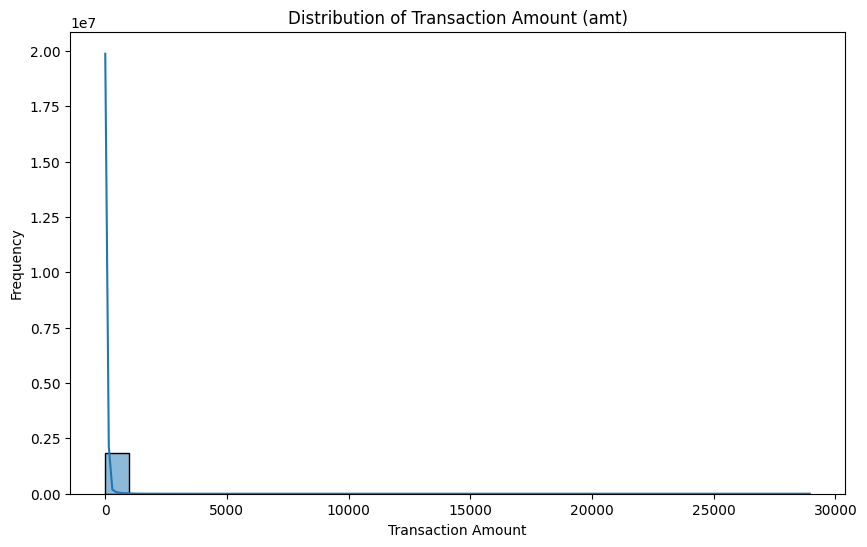

In [11]:
# Histogram of 'amt' (Transaction Amount)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='amt', bins=30, kde=True)
plt.title('Distribution of Transaction Amount (amt)')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

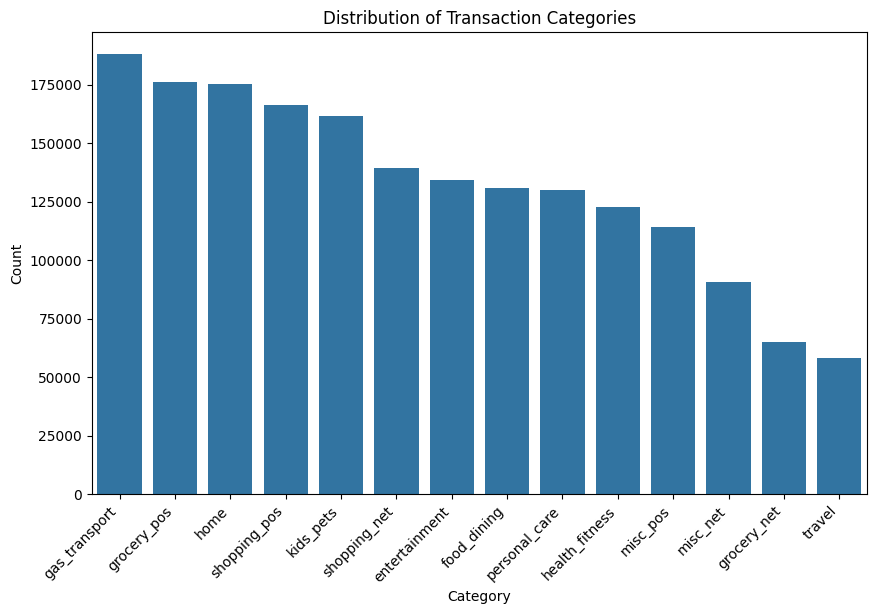

In [12]:
# Bar plot of 'category' (Transaction Category)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='category', order=df['category'].value_counts().index)
plt.title('Distribution of Transaction Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [13]:
# obJList=df.select_dtypes(include="object").columns

# label_encoder=LabelEncoder()

# for i in obJList:
#     df[i]=label_encoder.fit_transform(df[i].astype(str))



In [14]:
# is_fraud=df[df['is_fraud']==1]
# print("fraudulent transactions prcentage : {}".format((is_fraud.shape[0]/df.shape[0])*100))
# is_fraud.amt.describe()

In [15]:
# not_fraud=df[df['is_fraud']==0]
# print("non fraudulent transactions prcentage : {}".format((not_fraud.shape[0]/df.shape[0])*100))
# not_fraud.amt.describe()

In [16]:
# plt.pie(df.is_fraud.value_counts(),
# 		labels= ['not a  fraudulent transaction', '  fraudulent transaction'],
# 		autopct='%.4f', shadow=False)
# plt.title('Outcome Proportionality')
# plt.show()


## Dropping Unnecessary Features

In [17]:
# List of columns to drop
columns_to_drop = ['Unnamed: 0','cc_num','first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'city_pop', 'merch_lat', 'merch_long','lat', 'long']

# Drop the specified columns
df.drop(columns_to_drop, axis=1, inplace=True)

# Display the updated dataframe info to verify
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   merchant    object 
 1   category    object 
 2   amt         float64
 3   job         object 
 4   dob         object 
 5   trans_num   object 
 6   unix_time   int64  
 7   is_fraud    int64  
 8   trans_date  object 
 9   trans_time  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 141.3+ MB


In [18]:
df.head(3)

,merchant,category,amt,job,dob,trans_num,unix_time,is_fraud,trans_date,trans_time
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,0,2019-01-01,00:00:18
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,0,2019-01-01,00:00:44
2,fraud_Lind-Buckridge,entertainment,220.11,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,0,2019-01-01,00:00:51


## Unique categories 

In [19]:
#Count unique values in 'category' column
num_unique_merchant = df['merchant'].nunique()

# Count unique values in 'category' column
num_unique_categories = df['category'].nunique()

# Count unique values in 'job' column
num_unique_jobs = df['job'].nunique()

print(f"Number of unique merchant: {num_unique_merchant}")
print(f"Number of unique categories: {num_unique_categories}")
print(f"Number of unique jobs: {num_unique_jobs}")


Number of unique categories: 693
Number of unique categories: 14
Number of unique jobs: 497


## Label Encoding

In [20]:
# Initialize LabelEncoders for each categorical column
merchant_encoder = LabelEncoder()
category_encoder = LabelEncoder()
job_encoder = LabelEncoder()

# Encode 'merchant' column
df['merchant_encoded'] = merchant_encoder.fit_transform(df['merchant'])

# Encode 'category' column
df['category_encoded'] = category_encoder.fit_transform(df['category'])

# Encode 'job' column
df['job_encoded'] = job_encoder.fit_transform(df['job'])

In [21]:
df.head(3)

,merchant,category,amt,job,dob,trans_num,unix_time,is_fraud,trans_date,trans_time,merchant_encoded,category_encoded,job_encoded
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,0,2019-01-01,00:00:18,514,8,372
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,0,2019-01-01,00:00:44,241,4,431
2,fraud_Lind-Buckridge,entertainment,220.11,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,0,2019-01-01,00:00:51,390,0,308


## Feature Engineering and Mapping

In [22]:
# Create mappings from encoded values back to original categories and jobs
merchant_mapping = dict(zip(merchant_encoder.transform(merchant_encoder.classes_), merchant_encoder.classes_))
category_mapping = dict(zip(category_encoder.transform(category_encoder.classes_), category_encoder.classes_))
job_mapping = dict(zip(job_encoder.transform(job_encoder.classes_), job_encoder.classes_))

# Display the mappings
print("Merchant Mapping:")
print(merchant_mapping)

print("Category Mapping:")
print(category_mapping)

print("Job Mapping:")
print(job_mapping)

Merchant Mapping:
{0: 'fraud_Abbott-Rogahn', 1: 'fraud_Abbott-Steuber', 2: 'fraud_Abernathy and Sons', 3: 'fraud_Abshire PLC', 4: 'fraud_Adams, Kovacek and Kuhlman', 5: 'fraud_Adams-Barrows', 6: 'fraud_Altenwerth, Cartwright and Koss', 7: 'fraud_Altenwerth-Kilback', 8: 'fraud_Ankunding LLC', 9: 'fraud_Ankunding-Carroll', 10: 'fraud_Armstrong, Walter and Gottlieb', 11: 'fraud_Auer LLC', 12: 'fraud_Auer-Mosciski', 13: 'fraud_Auer-West', 14: 'fraud_Bahringer Group', 15: 'fraud_Bahringer, Bergnaum and Quitzon', 16: 'fraud_Bahringer, Osinski and Block', 17: 'fraud_Bahringer, Schoen and Corkery', 18: 'fraud_Bahringer-Larson', 19: 'fraud_Bahringer-Streich', 20: 'fraud_Bailey-Morar', 21: 'fraud_Balistreri-Nader', 22: 'fraud_Barrows PLC', 23: 'fraud_Bartoletti and Sons', 24: 'fraud_Bartoletti-Wunsch', 25: 'fraud_Barton Inc', 26: 'fraud_Barton LLC', 27: 'fraud_Bashirian Group', 28: 'fraud_Bauch-Blanda', 29: 'fraud_Bauch-Raynor', 30: 'fraud_Baumbach Ltd', 31: 'fraud_Baumbach, Feeney and Morar', 3

In [23]:
# Display the mappings

print("Merchant Mapping:")
print(merchant_mapping)

Merchant Mapping:
{0: 'fraud_Abbott-Rogahn', 1: 'fraud_Abbott-Steuber', 2: 'fraud_Abernathy and Sons', 3: 'fraud_Abshire PLC', 4: 'fraud_Adams, Kovacek and Kuhlman', 5: 'fraud_Adams-Barrows', 6: 'fraud_Altenwerth, Cartwright and Koss', 7: 'fraud_Altenwerth-Kilback', 8: 'fraud_Ankunding LLC', 9: 'fraud_Ankunding-Carroll', 10: 'fraud_Armstrong, Walter and Gottlieb', 11: 'fraud_Auer LLC', 12: 'fraud_Auer-Mosciski', 13: 'fraud_Auer-West', 14: 'fraud_Bahringer Group', 15: 'fraud_Bahringer, Bergnaum and Quitzon', 16: 'fraud_Bahringer, Osinski and Block', 17: 'fraud_Bahringer, Schoen and Corkery', 18: 'fraud_Bahringer-Larson', 19: 'fraud_Bahringer-Streich', 20: 'fraud_Bailey-Morar', 21: 'fraud_Balistreri-Nader', 22: 'fraud_Barrows PLC', 23: 'fraud_Bartoletti and Sons', 24: 'fraud_Bartoletti-Wunsch', 25: 'fraud_Barton Inc', 26: 'fraud_Barton LLC', 27: 'fraud_Bashirian Group', 28: 'fraud_Bauch-Blanda', 29: 'fraud_Bauch-Raynor', 30: 'fraud_Baumbach Ltd', 31: 'fraud_Baumbach, Feeney and Morar', 3

In [24]:
print("Category Mapping:")
print(category_mapping)

Category Mapping:
{0: 'entertainment', 1: 'food_dining', 2: 'gas_transport', 3: 'grocery_net', 4: 'grocery_pos', 5: 'health_fitness', 6: 'home', 7: 'kids_pets', 8: 'misc_net', 9: 'misc_pos', 10: 'personal_care', 11: 'shopping_net', 12: 'shopping_pos', 13: 'travel'}


In [25]:
print("Job Mapping:")
print(job_mapping)

Job Mapping:
{0: 'Academic librarian', 1: 'Accountant, chartered', 2: 'Accountant, chartered certified', 3: 'Accountant, chartered public finance', 4: 'Accounting technician', 5: 'Acupuncturist', 6: 'Administrator', 7: 'Administrator, arts', 8: 'Administrator, charities/voluntary organisations', 9: 'Administrator, education', 10: 'Administrator, local government', 11: 'Advertising account executive', 12: 'Advertising account planner', 13: 'Advertising copywriter', 14: 'Advice worker', 15: 'Aeronautical engineer', 16: 'Agricultural consultant', 17: 'Aid worker', 18: 'Air broker', 19: 'Air cabin crew', 20: 'Air traffic controller', 21: 'Airline pilot', 22: 'Ambulance person', 23: 'Amenity horticulturist', 24: 'Analytical chemist', 25: 'Animal nutritionist', 26: 'Animal technologist', 27: 'Animator', 28: 'Applications developer', 29: 'Arboriculturist', 30: 'Archaeologist', 31: 'Architect', 32: 'Architectural technologist', 33: 'Archivist', 34: 'Armed forces logistics/support/administrativ

In [26]:
# Drop columns 'merchant', 'category', and 'job'
columns_to_drop = ['merchant', 'category', 'job']
df = df.drop(columns=columns_to_drop)

In [27]:
df.head(3)

,amt,dob,trans_num,unix_time,is_fraud,trans_date,trans_time,merchant_encoded,category_encoded,job_encoded
0,4.97,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,0,2019-01-01,00:00:18,514,8,372
1,107.23,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,0,2019-01-01,00:00:44,241,4,431
2,220.11,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,0,2019-01-01,00:00:51,390,0,308


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   amt               float64
 1   dob               object 
 2   trans_num         object 
 3   unix_time         int64  
 4   is_fraud          int64  
 5   trans_date        object 
 6   trans_time        object 
 7   merchant_encoded  int32  
 8   category_encoded  int32  
 9   job_encoded       int32  
dtypes: float64(1), int32(3), int64(2), object(4)
memory usage: 120.1+ MB


In [29]:
# Assuming df is your DataFrame containing the relevant columns
features = df.columns.tolist()
print("Features in your DataFrame:")
print(features)


Features in your DataFrame:
['amt', 'dob', 'trans_num', 'unix_time', 'is_fraud', 'trans_date', 'trans_time', 'merchant_encoded', 'category_encoded', 'job_encoded']


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   amt               float64
 1   dob               object 
 2   trans_num         object 
 3   unix_time         int64  
 4   is_fraud          int64  
 5   trans_date        object 
 6   trans_time        object 
 7   merchant_encoded  int32  
 8   category_encoded  int32  
 9   job_encoded       int32  
dtypes: float64(1), int32(3), int64(2), object(4)
memory usage: 120.1+ MB


In [31]:
df.head()

,amt,dob,trans_num,unix_time,is_fraud,trans_date,trans_time,merchant_encoded,category_encoded,job_encoded
0,4.97,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,0,2019-01-01,00:00:18,514,8,372
1,107.23,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,0,2019-01-01,00:00:44,241,4,431
2,220.11,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,0,2019-01-01,00:00:51,390,0,308
3,45.00,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,0,2019-01-01,00:01:16,360,2,330
4,41.96,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,0,2019-01-01,00:03:06,297,9,116


In [32]:
# Convert 'dob' to datetime format if it's not already
df['dob'] = pd.to_datetime(df['dob'])

# Extract the birth year
df['birth_year'] = df['dob'].dt.year

# Drop the 'dob' column
df.drop('dob', axis=1, inplace=True)

df.head()

,amt,trans_num,unix_time,is_fraud,trans_date,trans_time,merchant_encoded,category_encoded,job_encoded,birth_year
0,4.97,0b242abb623afc578575680df30655b9,1325376018,0,2019-01-01,00:00:18,514,8,372,1988
1,107.23,1f76529f8574734946361c461b024d99,1325376044,0,2019-01-01,00:00:44,241,4,431,1978
2,220.11,a1a22d70485983eac12b5b88dad1cf95,1325376051,0,2019-01-01,00:00:51,390,0,308,1962
3,45.00,6b849c168bdad6f867558c3793159a81,1325376076,0,2019-01-01,00:01:16,360,2,330,1967
4,41.96,a41d7549acf90789359a9aa5346dcb46,1325376186,0,2019-01-01,00:03:06,297,9,116,1986


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   amt               float64
 1   trans_num         object 
 2   unix_time         int64  
 3   is_fraud          int64  
 4   trans_date        object 
 5   trans_time        object 
 6   merchant_encoded  int32  
 7   category_encoded  int32  
 8   job_encoded       int32  
 9   birth_year        int32  
dtypes: float64(1), int32(4), int64(2), object(3)
memory usage: 113.1+ MB


In [34]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'trans_num' column
df['trans_num_encoded'] = label_encoder.fit_transform(df['trans_num'])


# Assuming df is the DataFrame
df.drop('trans_num', axis=1, inplace=True)

# Display the updated DataFrame to verify
df.head()


,amt,unix_time,is_fraud,trans_date,trans_time,merchant_encoded,category_encoded,job_encoded,birth_year,trans_num_encoded
0,4.97,1325376018,0,2019-01-01,00:00:18,514,8,372,1988,80326
1,107.23,1325376044,0,2019-01-01,00:00:44,241,4,431,1978,227462
2,220.11,1325376051,0,2019-01-01,00:00:51,390,0,308,1962,1169030
3,45.00,1325376076,0,2019-01-01,00:01:16,360,2,330,1967,777909
4,41.96,1325376186,0,2019-01-01,00:03:06,297,9,116,1986,1186866


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   amt                float64
 1   unix_time          int64  
 2   is_fraud           int64  
 3   trans_date         object 
 4   trans_time         object 
 5   merchant_encoded   int32  
 6   category_encoded   int32  
 7   job_encoded        int32  
 8   birth_year         int32  
 9   trans_num_encoded  int32  
dtypes: float64(1), int32(5), int64(2), object(2)
memory usage: 106.0+ MB


## Convert 'trans_date' to Unix timestamp (seconds since epoch)

In [36]:
# Assuming 'trans_date' is already in datetime format, if not, convert it first
# Convert 'trans_date' to Unix timestamp (seconds since epoch)
df['trans_date_unix'] = pd.to_datetime(df['trans_date']).apply(lambda x: int(x.timestamp()))

# Drop the original 'trans_date' column if not needed anymore
df.drop('trans_date', axis=1, inplace=True)

# Display the updated DataFrame
df.head(3)


,amt,unix_time,is_fraud,trans_time,merchant_encoded,category_encoded,job_encoded,birth_year,trans_num_encoded,trans_date_unix
0,4.97,1325376018,0,00:00:18,514,8,372,1988,80326,1546300800
1,107.23,1325376044,0,00:00:44,241,4,431,1978,227462,1546300800
2,220.11,1325376051,0,00:00:51,390,0,308,1962,1169030,1546300800


### Convert 'trans_time' to timedelta

In [37]:
# Convert 'trans_time' to timedelta (seconds since midnight)
df['trans_time_seconds'] = pd.to_datetime(df['trans_time'], format='%H:%M:%S').dt.hour * 3600 + \
                           pd.to_datetime(df['trans_time'], format='%H:%M:%S').dt.minute * 60 + \
                           pd.to_datetime(df['trans_time'], format='%H:%M:%S').dt.second

# Drop the original 'trans_time' column if not needed anymore
df.drop('trans_time', axis=1, inplace=True)

# Display the updated DataFrame
df.head(3)


,amt,unix_time,is_fraud,merchant_encoded,category_encoded,job_encoded,birth_year,trans_num_encoded,trans_date_unix,trans_time_seconds
0,4.97,1325376018,0,514,8,372,1988,80326,1546300800,18
1,107.23,1325376044,0,241,4,431,1978,227462,1546300800,44
2,220.11,1325376051,0,390,0,308,1962,1169030,1546300800,51


## Outlier Analysis

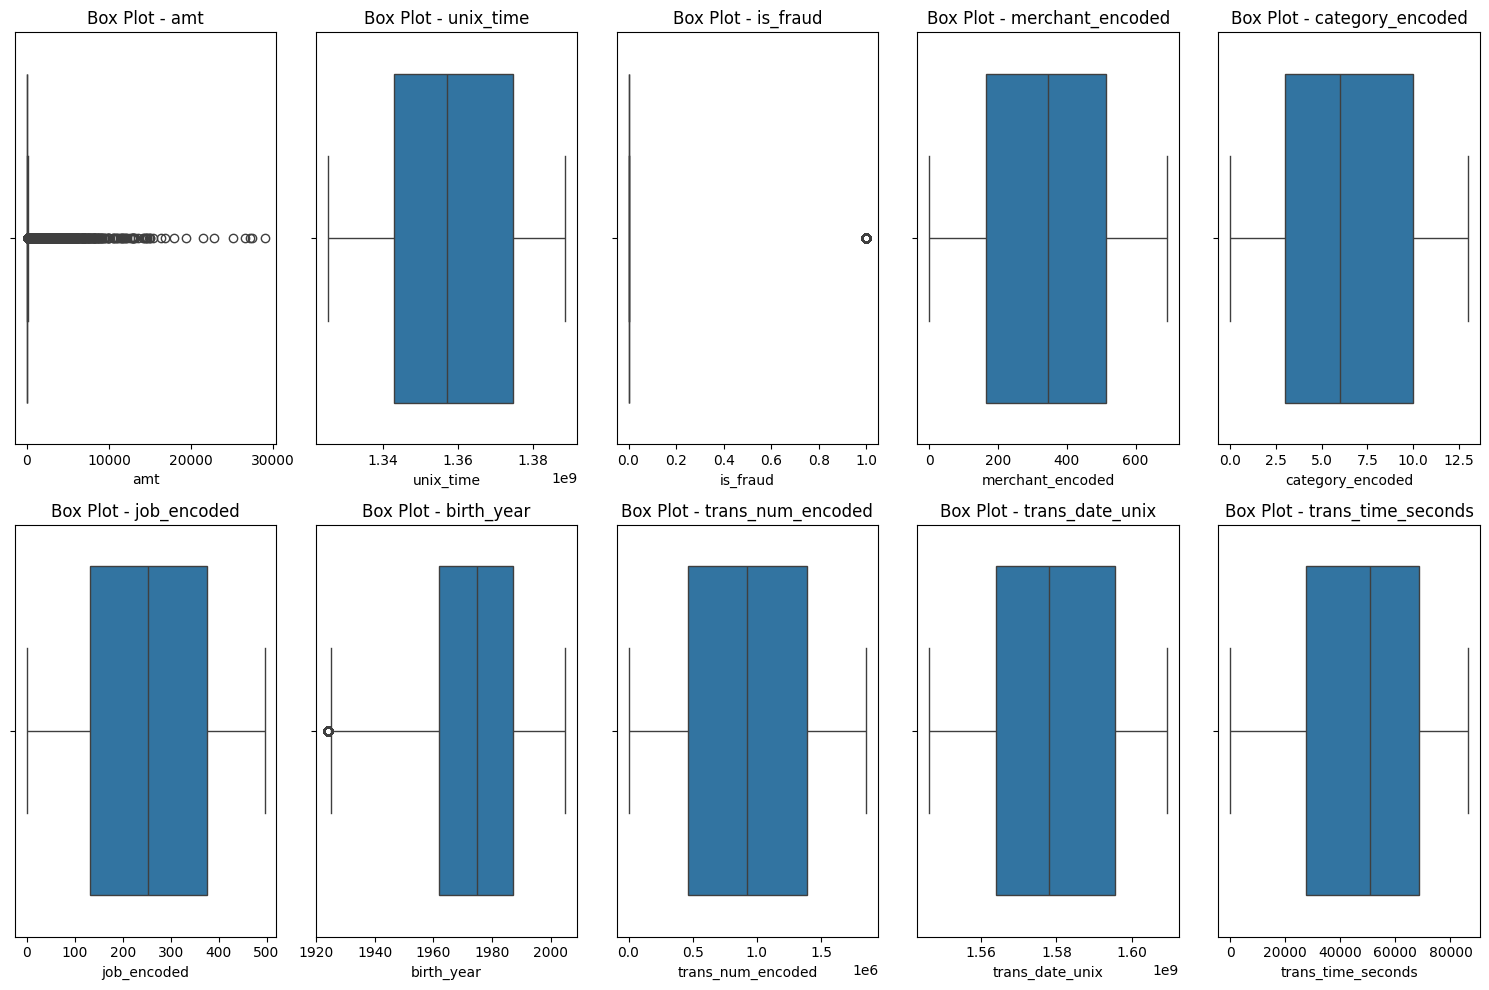

In [38]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 5, 1)
sns.boxplot(x='amt', data=df)
plt.title('Box Plot - amt')

plt.subplot(2, 5, 2)
sns.boxplot(x='unix_time', data=df)
plt.title('Box Plot - unix_time')

plt.subplot(2, 5, 3)
sns.boxplot(x='is_fraud', data=df)
plt.title('Box Plot - is_fraud')

plt.subplot(2, 5, 4)
sns.boxplot(x='merchant_encoded', data=df)
plt.title('Box Plot - merchant_encoded')

plt.subplot(2, 5, 5)
sns.boxplot(x='category_encoded', data=df)
plt.title('Box Plot - category_encoded')

plt.subplot(2, 5, 6)
sns.boxplot(x='job_encoded', data=df)
plt.title('Box Plot - job_encoded')

plt.subplot(2, 5, 7)
sns.boxplot(x='birth_year', data=df)
plt.title('Box Plot - birth_year')

plt.subplot(2, 5, 8)
sns.boxplot(x='trans_num_encoded', data=df)
plt.title('Box Plot - trans_num_encoded')

plt.subplot(2, 5, 9)
sns.boxplot(x='trans_date_unix', data=df)
plt.title('Box Plot - trans_date_unix')

plt.subplot(2, 5, 10)
sns.boxplot(x='trans_time_seconds', data=df)
plt.title('Box Plot - trans_time_seconds')

plt.tight_layout()
plt.show()


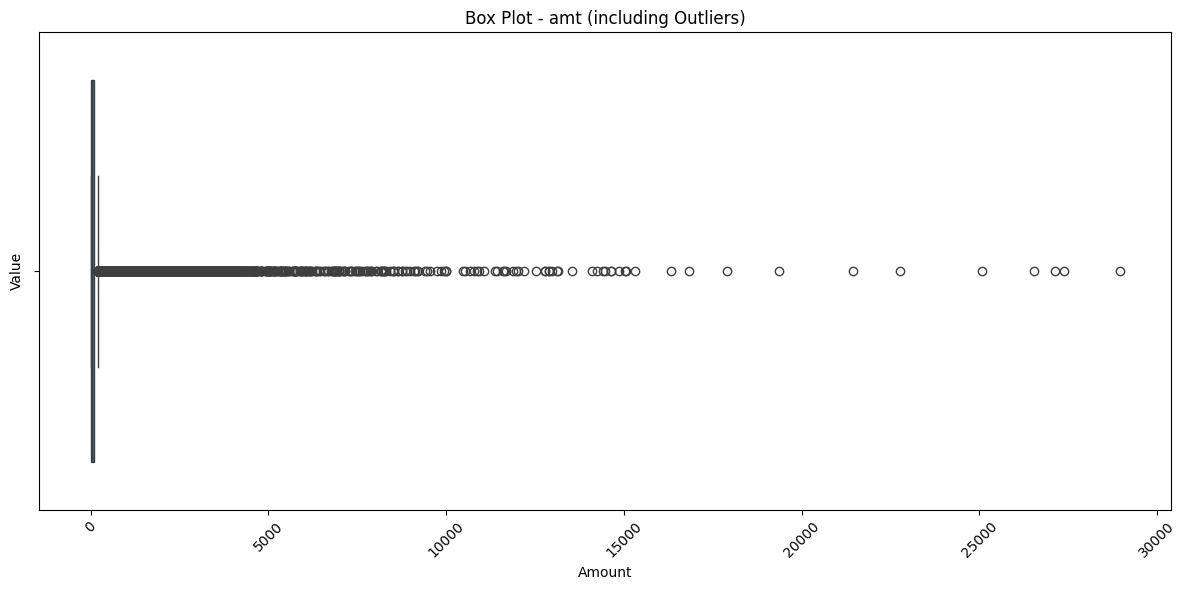

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.boxplot(x='amt', data=df)
plt.title('Box Plot - amt (including Outliers)')
plt.xlabel('Amount')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [40]:
# Calculate quartiles
Q1 = df['amt'].quantile(0.25)
Q3 = df['amt'].quantile(0.75)
IQR = Q3 - Q1

# Calculate upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['amt'] < lower_bound) | (df['amt'] > upper_bound)]
print("Number of outliers:", outliers.shape[0])


Number of outliers: 95054


In [41]:
# Remove outliers from the DataFrame
df_no_outliers = df[(df['amt'] >= lower_bound) & (df['amt'] <= upper_bound)]


In [42]:
# Replace outliers with the median value
median_amt = df['amt'].median()
df['amt'] = np.where((df['amt'] < lower_bound) | (df['amt'] > upper_bound), median_amt, df['amt'])


In [43]:
# Apply log transformation to handle skewness and outliers
df['amt_transformed'] = np.log(df['amt'] + 1)  # Adding 1 to avoid log(0)


In [44]:
# Cap values above the upper bound and floor values below the lower bound
df['amt_capped'] = df['amt'].clip(lower=lower_bound, upper=upper_bound)


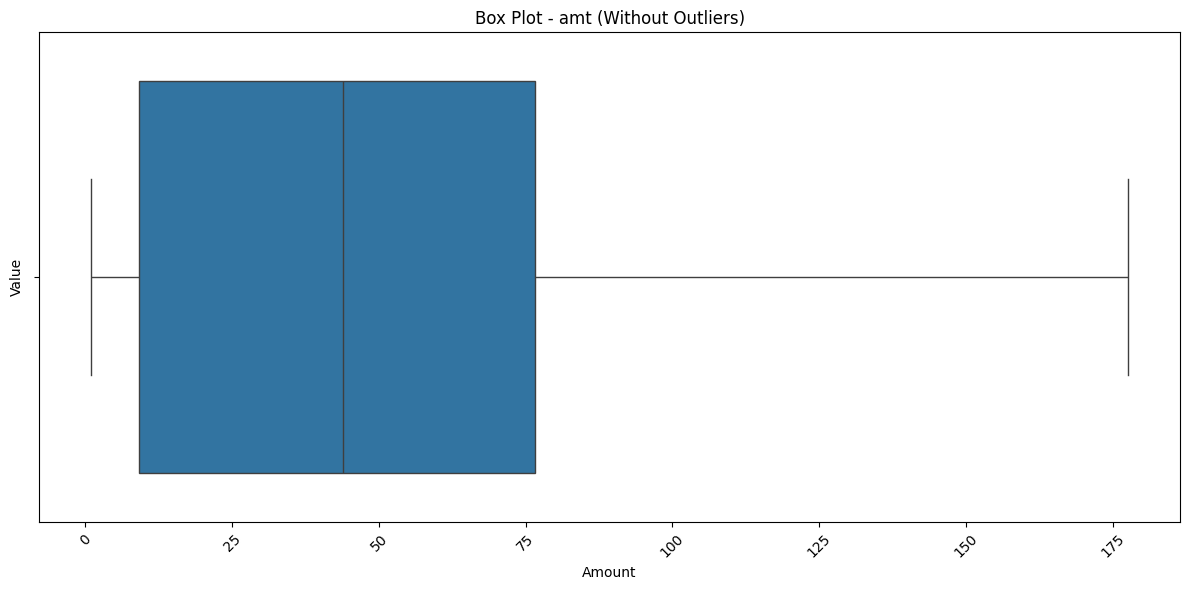

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='amt', data=df_no_outliers, showfliers=False)
plt.title('Box Plot - amt (Without Outliers)')
plt.xlabel('Amount')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [46]:
df_no_outliers.head(3)

,amt,unix_time,is_fraud,merchant_encoded,category_encoded,job_encoded,birth_year,trans_num_encoded,trans_date_unix,trans_time_seconds
0,4.97,1325376018,0,514,8,372,1988,80326,1546300800,18
1,107.23,1325376044,0,241,4,431,1978,227462,1546300800,44
3,45.00,1325376076,0,360,2,330,1967,777909,1546300800,76


In [47]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1757340 entries, 0 to 1852393
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   amt                 float64
 1   unix_time           int64  
 2   is_fraud            int64  
 3   merchant_encoded    int32  
 4   category_encoded    int32  
 5   job_encoded         int32  
 6   birth_year          int32  
 7   trans_num_encoded   int32  
 8   trans_date_unix     int64  
 9   trans_time_seconds  int32  
dtypes: float64(1), int32(6), int64(3)
memory usage: 107.3 MB


In [48]:
# Drop 'amt' and 'amt_transformed' columns
# df_no_outliers.drop(['amt', 'amt_transformed'], axis=1, inplace=True)

# Rename 'amt_capped' to 'amt'
df_no_outliers.rename(columns={'amt_capped': 'amt'}, inplace=True)

# Convert 'amt' to integer format
df_no_outliers['amt'] = df_no_outliers['amt'].astype(int)

# Display the updated DataFrame info
df_no_outliers.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1757340 entries, 0 to 1852393
Data columns (total 10 columns):
 #   Column              Dtype
---  ------              -----
 0   amt                 int32
 1   unix_time           int64
 2   is_fraud            int64
 3   merchant_encoded    int32
 4   category_encoded    int32
 5   job_encoded         int32
 6   birth_year          int32
 7   trans_num_encoded   int32
 8   trans_date_unix     int64
 9   trans_time_seconds  int32
dtypes: int32(7), int64(3)
memory usage: 100.6 MB


In [49]:
df_no_outliers.head(3)

,amt,unix_time,is_fraud,merchant_encoded,category_encoded,job_encoded,birth_year,trans_num_encoded,trans_date_unix,trans_time_seconds
0,4,1325376018,0,514,8,372,1988,80326,1546300800,18
1,107,1325376044,0,241,4,431,1978,227462,1546300800,44
3,45,1325376076,0,360,2,330,1967,777909,1546300800,76


## Standard Scaler

In [50]:
from sklearn.preprocessing import StandardScaler

# Define columns to scale
columns_to_scale = ['unix_time', 'birth_year', 'trans_num_encoded', 'trans_date_unix', 'trans_time_seconds', 'amt']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
df_no_outliers[columns_to_scale] = scaler.fit_transform(df_no_outliers[columns_to_scale])

# Display the scaled DataFrame
df_no_outliers.head()


,amt,unix_time,is_fraud,merchant_encoded,category_encoded,job_encoded,birth_year,trans_num_encoded,trans_date_unix,trans_time_seconds
0,-1.049272,-1.830774,0,514,8,372,0.849541,-1.581821,-1.822826,-1.959192
1,1.301785,-1.830773,0,241,4,431,0.276603,-1.306694,-1.822826,-1.958130
3,-0.113414,-1.830771,0,360,2,330,-0.353629,-0.277422,-1.822826,-1.956823
4,-0.204718,-1.830765,0,297,9,116,0.734953,0.487279,-1.822826,-1.952331
5,1.005050,-1.830761,0,607,2,482,-0.697392,-1.399399,-1.822826,-1.949799


In [51]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1757340 entries, 0 to 1852393
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   amt                 float64
 1   unix_time           float64
 2   is_fraud            int64  
 3   merchant_encoded    int32  
 4   category_encoded    int32  
 5   job_encoded         int32  
 6   birth_year          float64
 7   trans_num_encoded   float64
 8   trans_date_unix     float64
 9   trans_time_seconds  float64
dtypes: float64(6), int32(3), int64(1)
memory usage: 127.4 MB


### Type Casting

In [52]:
# Convert selected columns from int32 to float64
df_no_outliers['merchant_encoded'] = df_no_outliers['merchant_encoded'].astype(float)
df_no_outliers['category_encoded'] = df_no_outliers['category_encoded'].astype(float)
df_no_outliers['job_encoded'] = df_no_outliers['job_encoded'].astype(float)

# Convert 'is_fraud' to float64
df_no_outliers['is_fraud'] = df_no_outliers['is_fraud'].astype(float)

# Display the updated DataFrame info to verify the changes
df_no_outliers.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1757340 entries, 0 to 1852393
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   amt                 float64
 1   unix_time           float64
 2   is_fraud            float64
 3   merchant_encoded    float64
 4   category_encoded    float64
 5   job_encoded         float64
 6   birth_year          float64
 7   trans_num_encoded   float64
 8   trans_date_unix     float64
 9   trans_time_seconds  float64
dtypes: float64(10)
memory usage: 147.5 MB


In [53]:
df_no_outliers.columns

Index(['amt', 'unix_time', 'is_fraud', 'merchant_encoded', 'category_encoded',
       'job_encoded', 'birth_year', 'trans_num_encoded', 'trans_date_unix',
       'trans_time_seconds'],
      dtype='object')

## Train and test Split of the data

In [54]:
# Separate features (X) and target variable (y)
X = df_no_outliers.drop('is_fraud', axis=1)
y = df_no_outliers['is_fraud']

# Split data into training and testing sets (adjust test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Training and building

### 1) Logistic Regression

In [55]:
# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)


LogisticRegression()

In [56]:
# Make predictions on test data
y_pred = log_reg.predict(X_test)

In [57]:
# Evaluate performance
print("Evaluation results for Logistic Regression:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC score: {roc_auc_score(y_test, y_pred)}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Evaluation results for Logistic Regression:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    350988
         1.0       0.00      0.00      0.00       480

    accuracy                           1.00    351468
   macro avg       0.50      0.50      0.50    351468
weighted avg       1.00      1.00      1.00    351468

ROC AUC score: 0.5

Confusion Matrix:
[[350988      0]
 [   480      0]]


### 2) Random Forest

In [58]:
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [59]:
# Predict on the test set
y_pred = rf_classifier.predict(X_test)

In [60]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    350988
         1.0       0.97      0.41      0.57       480

    accuracy                           1.00    351468
   macro avg       0.98      0.70      0.79    351468
weighted avg       1.00      1.00      1.00    351468

ROC AUC Score: 0.7031150281491105
Confusion Matrix:
[[350981      7]
 [   285    195]]


### 3) Neural Network

In [61]:
# Initialize Sequential model
model = Sequential()

# Add input layer (specify input_dim as the number of features in X)
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

# Add hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

# Add output layer
model.add(Dense(1, activation='sigmoid'))  # Binary classification (fraud or not)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [62]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=1)


Epoch 1/10
21967/21967 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step - accuracy: 0.9978 - loss: 0.0594 - val_accuracy: 0.9986 - val_loss: 0.0105
Epoch 2/10
21967/21967 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step - accuracy: 0.9987 - loss: 0.0102 - val_accuracy: 0.9986 - val_loss: 0.0104
Epoch 3/10
21967/21967 ━━━━━━━━━━━━━━━━━━━━ 27s 1ms/step - accuracy: 0.9987 - loss: 0.0103 - val_accuracy: 0.9986 - val_loss: 0.0104
Epoch 4/10
21967/21967 ━━━━━━━━━━━━━━━━━━━━ 28s 1ms/step - accuracy: 0.9987 - loss: 0.0102 - val_accuracy: 0.9986 - val_loss: 0.0104
Epoch 5/10
21967/21967 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - accuracy: 0.9987 - loss: 0.0105 - val_accuracy: 0.9986 - val_loss: 0.0104
Epoch 6/10
21967/21967 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step - accuracy: 0.9987 - loss: 0.0098 - val_accuracy: 0.9986 - val_loss: 0.0104
Epoch 7/10
21967/21967 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step - accuracy: 0.9987 - loss: 0.0103 - val_accuracy: 0.9986 - val_loss: 0.0104
Epoch 8/10
21967/21967 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step - accuracy: 

In [63]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

10984/10984 ━━━━━━━━━━━━━━━━━━━━ 7s 677us/step
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    350988
         1.0       0.00      0.00      0.00       480

    accuracy                           1.00    351468
   macro avg       0.50      0.50      0.50    351468
weighted avg       1.00      1.00      1.00    351468

ROC AUC Score: 0.5126283786767641
Confusion Matrix:
[[350988      0]
 [   480      0]]


## Decision Tree Classifier

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions and evaluate model performance
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
precision = precision_score(y_test, y_pred)
print(f"Model precision: {precision:.2f}")
recall = recall_score(y_test, y_pred)
print(f"Model recall: {recall:.2f}")

Model Accuracy: 0.9985

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    350988
         1.0       0.46      0.48      0.47       480

    accuracy                           1.00    351468
   macro avg       0.73      0.74      0.73    351468
weighted avg       1.00      1.00      1.00    351468


Confusion Matrix:
[[350720    268]
 [   251    229]]
Model precision: 0.46
Model recall: 0.48


## Pickle file

## Logistic Regression

In [65]:
import pickle

# Assuming you have your trained logistic regression model in `model` (e.g., from sklearn.linear_model import LogisticRegression)

# Specify the filename (replace 'my_model.pkl' with your desired name)
filename = 'Logistic_Regression_Model.pkl'

# Open the file in binary write mode
with open(filename, 'wb') as file:
    # Pickle the model
    pickle.dump(log_reg, file)

print(f"Logistic regression model saved as: {filename}")


Logistic regression model saved as: Logistic_Regression_Model.pkl


### Random forest

In [66]:
import pickle

# Assuming you have your trained random forest model in `rf_classifier`

# Specify the filename (replace 'my_model.pkl' with your desired name)
filename = 'Random_Forest_Model.pkl'

# Open the file in binary write mode
with open(filename, 'wb') as file:
    # Pickle the model
    pickle.dump(rf_classifier, file)

print(f"Random forest model saved as: {filename}")


Random forest model saved as: Random_Forest_Model.pkl


### Neural Network

In [67]:
import tensorflow as tf

# Assuming you have your trained neural network model in `model`

# Specify the filename (replace 'my_model.h5' with your desired name)
filename = 'Neural_Network_Model.keras'

# Open the file in binary write mode
with open(filename, 'wb') as file:
    # Pickle the model
    pickle.dump(model, file)
# Save the model
model.save(filename)

print(f"Neural network model saved as: {filename}")


Neural network model saved as: Neural_Network_Model.keras


### 